## University Admission Predictor - Multiple Linear Regression
In this module, we will be predicting the probability of being accepted for a graduate program. The data is real (not synthetic) and comes from 

https://www.kaggle.com/mohansacharya/graduate-admissions

This particular dataset contains the following:
* GRE Scores (out of 340)
* TOEFL Scores (out of 120)
* Univeristy Rating (out of 5)
* Statement of Purpose/Letter of Recommendation Strength (out of 5)
* Undergraduate GPA (out of 10)
* Research Experience (out of 1)
* Target: Chance of Admission (probability between 0 and 1)

### Libraries and Packages

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [16]:
admissions_df = pd.read_csv('Admission.csv')

## Exploratory Data Analysis (EDA)

In [17]:
admissions_df.sample(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
395,396,324,110,3,3.5,3.5,9.04,1,0.82
110,111,305,108,5,3.0,3.0,8.48,0,0.61
210,211,325,108,4,4.5,4.0,9.06,1,0.79
392,393,326,112,4,4.0,3.5,9.12,1,0.84
372,373,336,119,4,4.5,4.0,9.62,1,0.95
112,113,301,107,3,3.5,3.5,8.34,1,0.62
1,2,324,107,4,4.0,4.5,8.87,1,0.76
332,333,308,106,3,3.5,2.5,8.21,1,0.75
61,62,307,101,3,4.0,3.0,8.20,0,0.47
113,114,320,110,2,4.0,3.5,8.56,0,0.72


In [18]:
admissions_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Serial No.,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Admission Chance,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


In [19]:
admissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Admission Chance     400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


### Data Cleaning/Preprocessing

In [20]:
admissions_df = admissions_df.drop(['Serial No.'], axis=1)

### Visualizations

#### Distribution Plots

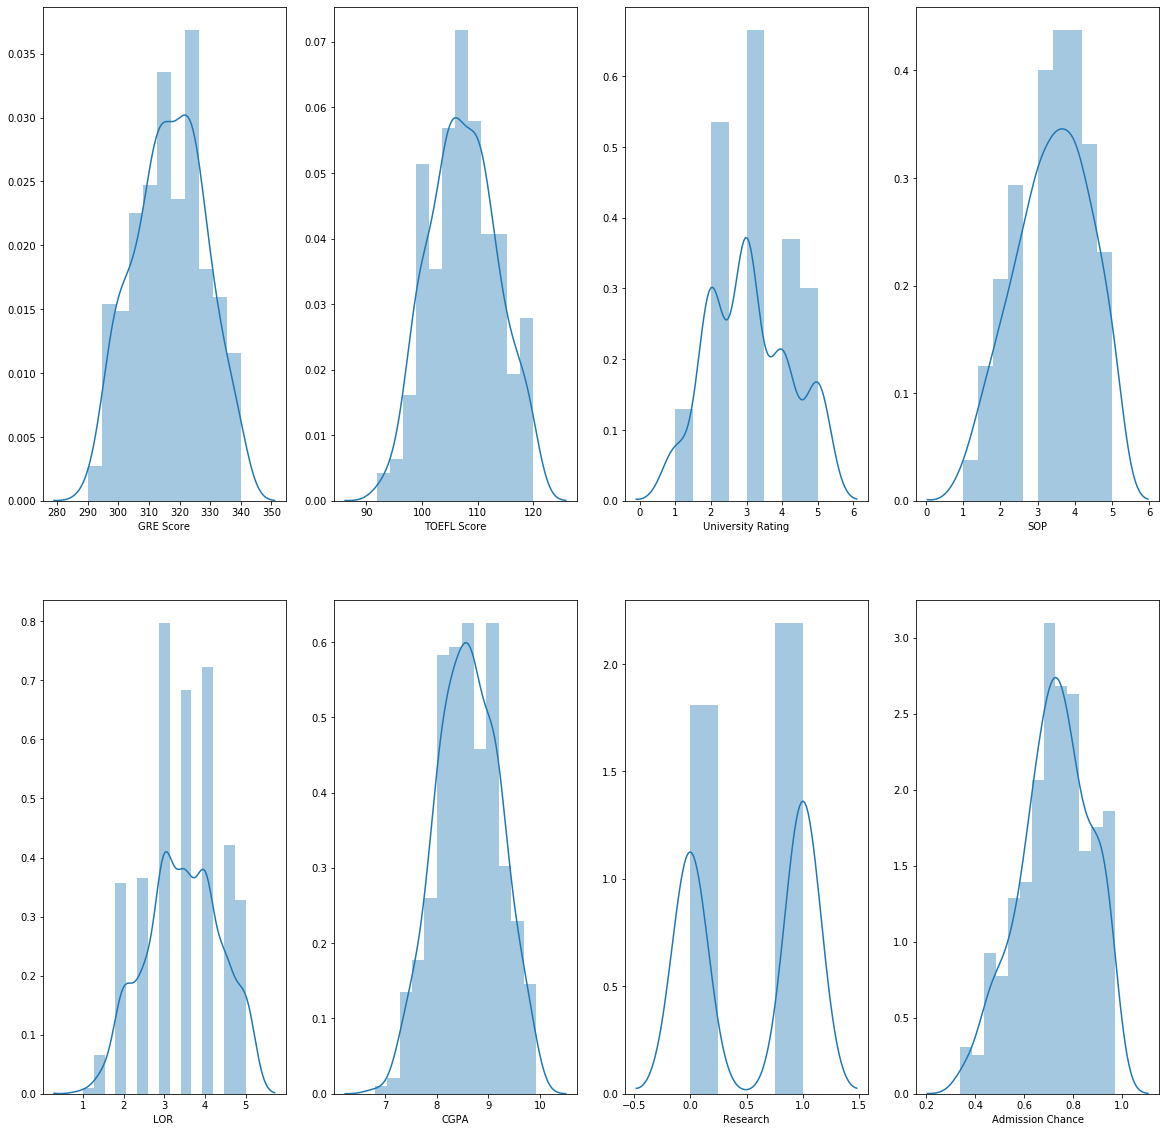

In [36]:
columns = admissions_df.columns.values

fig, ax = plt.subplots(2, 4, figsize=(20,20))

i = 1
for column in column_headers:
    plt.subplot(2,4,i)
    sns.distplot(admissions_df[column])
    i+=1

This is the distribution plots of each one of our features.

#### Correlation Matrix

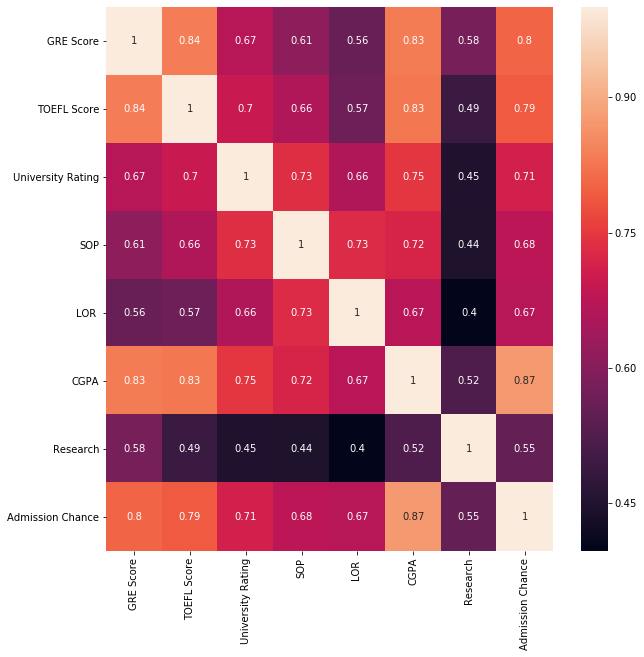

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(admissions_df.corr(), annot=True)
plt.show()

We see in our correlation matrix some strong relationships. For example, students who have a high undergraduate GPA are likely to have a good TOEFL score.

#### Pairplot (huge!)

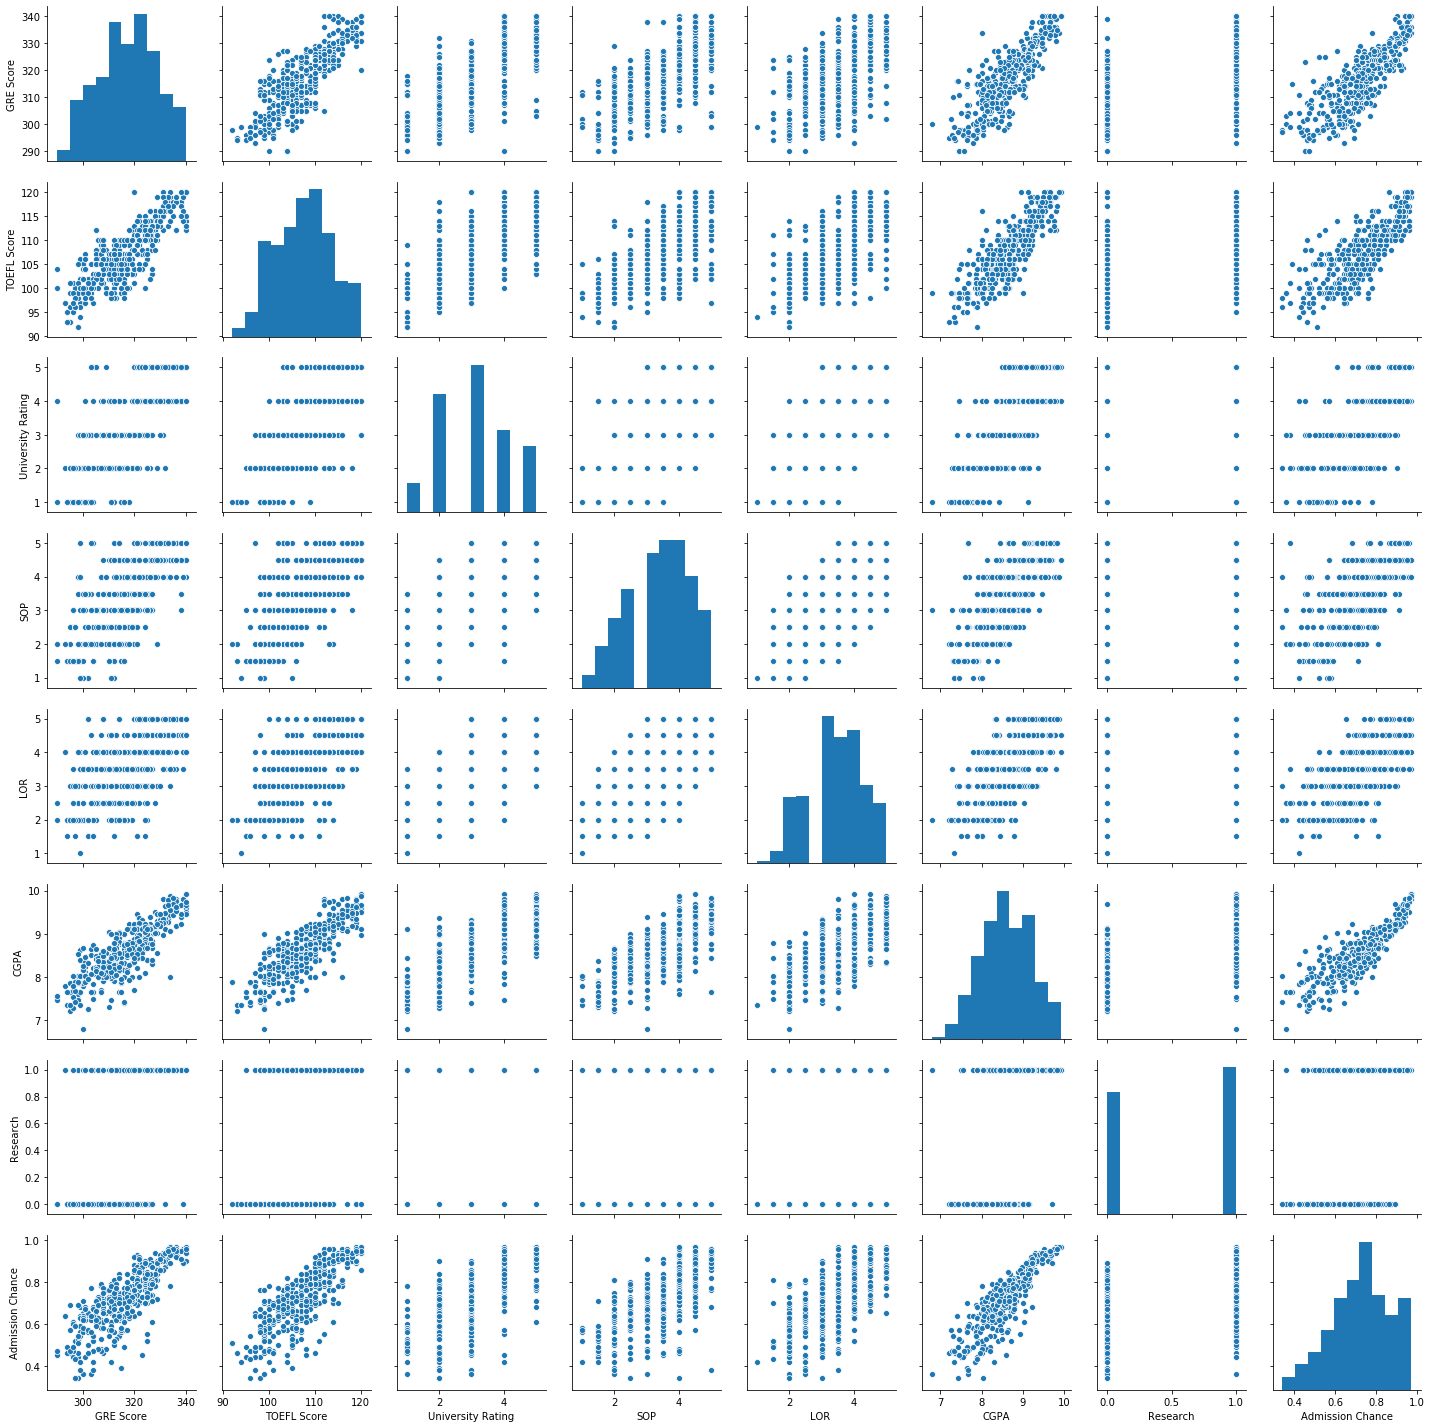

In [33]:
sns.pairplot(admissions_df)
plt.show()

#### Box and Violinplots

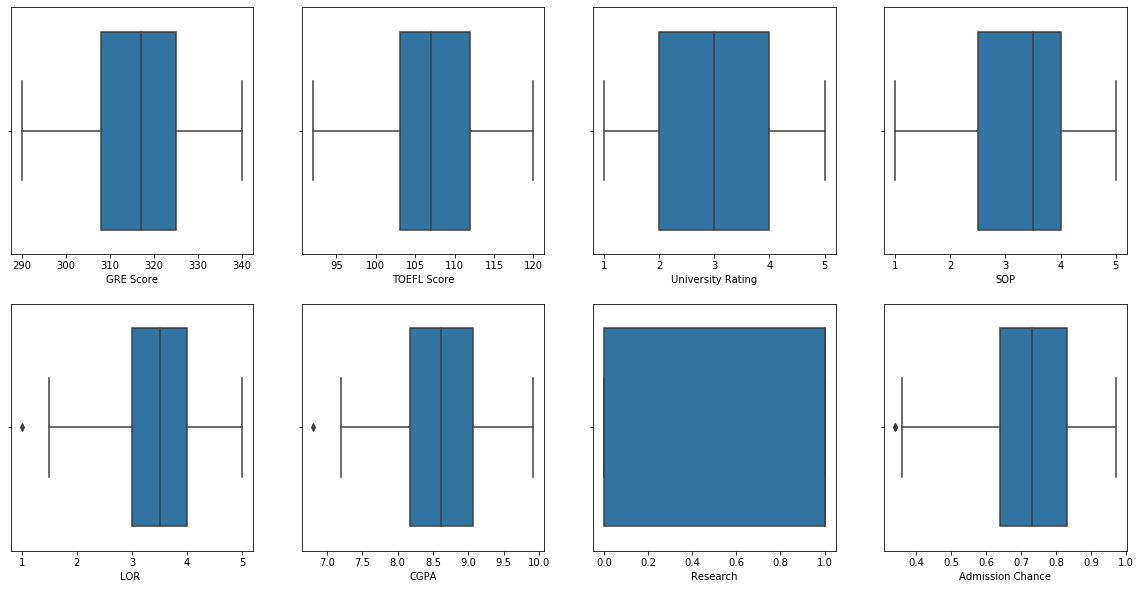

In [38]:
fig, ax = plt.subplots(2, 4, figsize = (20,10))

i=1
for column in columns:
        plt.subplot(2,4,i)
        sns.boxplot(admissions_df[column])
        i+=1

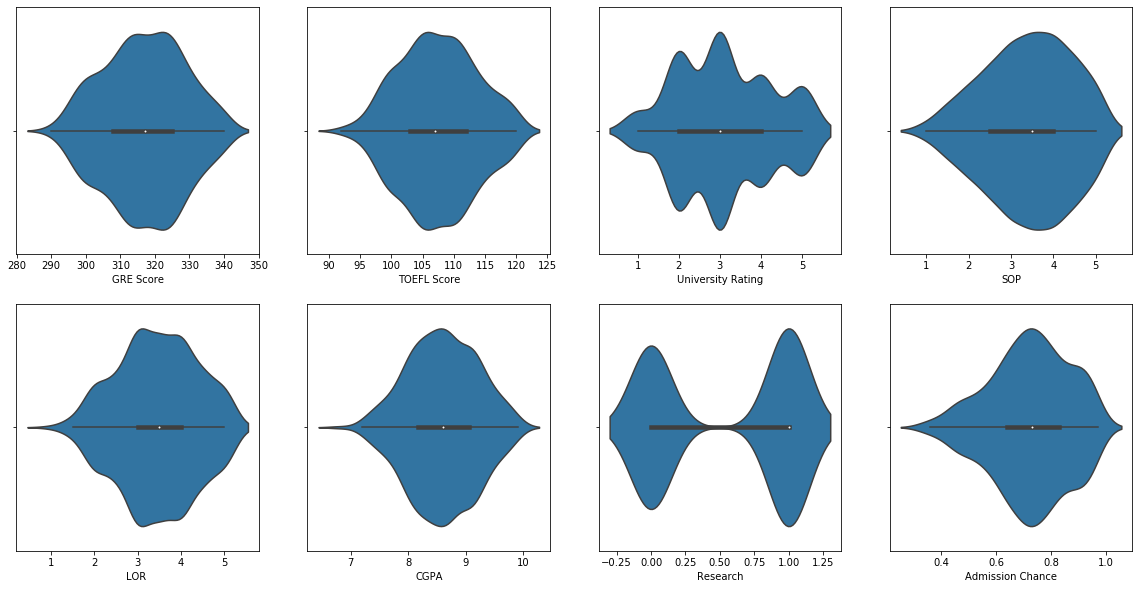

In [40]:
fig, ax = plt.subplots(2, 4, figsize = (20,10))

i=1
for column in columns:
        plt.subplot(2,4,i)
        sns.violinplot(admissions_df[column])
        i+=1

## Testing and Training Model/Further Data Preprocessing

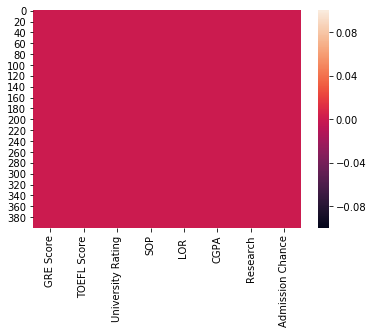

In [44]:
sns.heatmap(admissions_df.isnull())
plt.show()

Just a nice visual way to inspect whether or not we have any null values in our data. Now let us split our data into our features and target variables:

In [48]:
X = admissions_df.drop(['Admission Chance'], axis = 1)
y = admissions_df['Admission Chance']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
for i in np.arange(0, len(regressor.coef_)):
    print(f'Regression Coefficient b_{i+1}: {regressor.coef_[i]:2.4f}')
print(f'Regression Intercept b_0: {regressor.intercept_:2.4f}')

Regression Coefficient b_1: 0.0019
Regression Coefficient b_2: 0.0027
Regression Coefficient b_3: 0.0074
Regression Coefficient b_4: -0.0003
Regression Coefficient b_5: 0.0158
Regression Coefficient b_6: 0.1147
Regression Coefficient b_7: 0.0222
Regression Intercept b_0: -1.2302


## Evaluation of the Model
We will compare the model predictions to the true values and take a visual look at the error generated. We can also use other metrics to evaluate our model.

In [61]:
y_pred = regressor.predict(X_test)

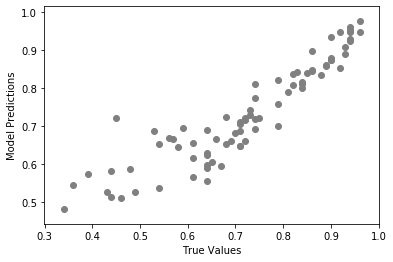

In [66]:
plt.scatter(y_test, y_pred, color='gray')
plt.ylabel('Model Predictions')
plt.xlabel('True Values')
plt.show()

If our model did well, we should see a 45 degree line passing throguh our points. This does ok here, but we do see some spread in our points.

In [68]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred)) , '.3f'))
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
MAPE = np.mean( np.abs((y_test - y_pred) /y_test ) ) * 100

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMean Absolute Percentage Error =', MAPE, '%')

RMSE = 0.068 
MSE = 0.004617003377285011 
MAE = 0.04795673362091198 
R2 = 0.8212082591486991 
Adjusted R2 = 0.803825728788156 
Mean Absolute Percentage Error = 8.5118487324017 %


According to our metrics, we can see that our model can be improved.

## Backward Elimination

In [89]:
X.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1


In [95]:
import statsmodels.api as sm
X_opt = X.iloc[:, [0, 1, 2, 4, 5, 6]]
ols = sm.OLS(endog = y, exog = X_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Admission Chance   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              7057.
Date:                Tue, 31 Dec 2019   Prob (F-statistic):                        0.00
Time:                        11:36:24   Log-Likelihood:                          491.13
No. Observations:                 400   AIC:                                     -970.3
Df Residuals:                     394   BIC:                                     -946.3
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GRE Score            -0.0029      0.000     -6.979      0.000      -0.004      -0.002
TOEFL Score           0.0032      0.001      2.683      0.008       0.001       0.006
University Rating     0.0201      0.005      4.182      0.000       0.011       0.030
LOR                   0.0234      0.006      4.125      0.000       0.012       0.035
CGPA                  0.1311      0.013      9.736      0.000       0.105       0.158
Research              0.0569      0.008      7.021      0.000       0.041       0.073
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   0.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.425
Skew:                          -1.024   Prob(JB):                     3.48e-23
Kurtosis:                       4.418   Cond. No.                     1.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""